# Clustering Tuscaloosa, Montgomery, Brimingham  Restaurants in Alabama

## Introduction

In [107]:
import pandas as pd
import numpy as np
import folium
import json
import requests
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
import pprint
import matplotlib.pyplot as plt

CLIENT_ID = "FFEFW3ZL0BZ4UXSVKSI0XSGC3FGI30HCTRQ5GPZLSJUR0GSI"
CLIENT_SECRET = "NO3YYEJ35KLKMMAAEWLKRQOCEV0VG35RK5ENJX4NKR4DZAOG"
VERSION = "20180604"
#key zomatto
key = "509c6a5ac1f97d60b55b4dc3da482107"

### Tuscaloosa restaurants

In [2]:
tuscaloosa_restaurants = pd.DataFrame()
tuscaloosa_coord = (33.2098,-87.5692)
pages = [0,20,40,60,80]
for page in pages:
    uris = "https://developers.zomato.com/api/v2.1/search?lat={}&lon={}&apikey={}&radius={}&start={}&count={}".format(tuscaloosa_coord[0],tuscaloosa_coord[1],key,10000,page,20)
    request_ = requests.get(uris).json()
    csv_ = json_normalize(request_['restaurants'])
    tuscaloosa_restaurants = tuscaloosa_restaurants.append(csv_)

Clean the dataframe

In [3]:
#Reset the index of the dataframe, becuase the dataframe is the result of the append method
tuscaloosa_restaurants.reset_index(inplace=True, drop=True)
#The feature that i'll use
feature = ['restaurant.name','restaurant.cuisines','restaurant.average_cost_for_two','restaurant.user_rating.aggregate_rating','restaurant.timings','restaurant.all_reviews_count',
           'restaurant.user_rating.votes','restaurant.location.latitude','restaurant.location.longitude']
#Only use the feature that i consider as more valuable
tuscaloosa_restaurants = tuscaloosa_restaurants[feature]
#Convert some of the features that supose to be fload
col_to_convert_to_float = ['restaurant.user_rating.aggregate_rating','restaurant.user_rating.votes', 'restaurant.location.latitude', 'restaurant.location.longitude']
for col in col_to_convert_to_float:
    tuscaloosa_restaurants[col] = tuscaloosa_restaurants[col].astype(float)
#make a coordinate column
tuscaloosa_restaurants['coordinate'] = [(i,j) for i, j in zip(tuscaloosa_restaurants['restaurant.location.latitude'], tuscaloosa_restaurants['restaurant.location.longitude'])]
    

In [4]:
tuscaloosa_restaurants.head()

restaurant.name         restaurant.cuisines  \
0                City Cafe    Diner, Seafood, Southern   
1  Swen Chinese Restaurant                     Chinese   
2   DePalma's Italian Cafe                     Italian   
3              Cypress Inn    American, Seafood, Steak   
4     Mugshots Grill & Bar  American, Burger, Bar Food   

   restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                               10                                      3.8   
1                               25                                      3.6   
2                               40                                      3.8   
3                               40                                      3.5   
4                               10                                      3.6   

                                  restaurant.timings  \
0             (Sun, Sat), Breakfast, Lunch (Mon-Fri)   
1  11 AM to 10 PM (Mon, Tue, Wed, Thu, Sun), 11 A...   
2  Closed (Mon),11 AM to 10 PM (Tue-Thu),11 AM to...   
3  11 AM to 9 PM (Mon-Thu), 11 AM to 10 PM (Fri-S...   
4  11 AM to 10 PM (Mon-Thu),11 AM to 11 PM (Fri-S...   

   restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                            38                         288.0   
1                            37                         192.0   
2                            93                         428.0   
3                            60                         303.0   
4                            74                         295.0   

   restaurant.location.latitude  restaurant.location.longitude  \
0                      33.21810                      -87.57830   
1                      33.21082                      -87.55275   
2                      33.21040                      -87.56710   
3                      33.22921                      -87.52863   
4                      33.20960                      -87.56810   

              coordinate  
0    (33.2181, -87.5783)  
1  (33.21082, -87.55275)  
2    (33.2104, -87.5671)  
3  (33.22921, -87.52863)  
4    (33.2096, -87.5681)

### Montgomery restaurants

In [5]:
montgomery_restaurants = pd.DataFrame()
montgomery_coord = (32.3792, -86.3077)
pages = [0,20,40,60,80]
for page in pages:
    uris = "https://developers.zomato.com/api/v2.1/search?lat={}&lon={}&apikey={}&radius={}&start={}&count={}".format(montgomery_coord[0],montgomery_coord[1],key,10000,page,20)
    request_ = requests.get(uris).json()
    csv_ = json_normalize(request_['restaurants'])
    montgomery_restaurants = montgomery_restaurants.append(csv_)

Clean the data with the same prosedure as Tuscaloosa data

In [6]:
montgomery_restaurants.reset_index(inplace=True, drop=True)
feature = ['restaurant.name','restaurant.cuisines','restaurant.average_cost_for_two','restaurant.user_rating.aggregate_rating','restaurant.timings','restaurant.all_reviews_count',
           'restaurant.user_rating.votes','restaurant.location.latitude','restaurant.location.longitude']
montgomery_restaurants = montgomery_restaurants[feature]
col_to_convert_to_float = ['restaurant.user_rating.aggregate_rating','restaurant.user_rating.votes', 'restaurant.location.latitude', 'restaurant.location.longitude']
for col in col_to_convert_to_float:
    montgomery_restaurants[col] = montgomery_restaurants[col].astype(float)
montgomery_restaurants['coordinate'] = [(i,j) for i, j in zip(montgomery_restaurants['restaurant.location.latitude'], montgomery_restaurants['restaurant.location.longitude'])]

In [7]:
montgomery_restaurants.head()

restaurant.name       restaurant.cuisines  \
0                     Sa Za            Italian, Pizza   
1                Sushi Cafe           Japanese, Sushi   
2       Lek's Railroad Thai        Asian, Sushi, Thai   
3             Wishbone Cafe  Sandwich, Seafood, Cajun   
4  Dreamland BBQ Montgomery     BBQ, Burger, Sandwich   

   restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                               40                                      4.2   
1                               25                                      4.9   
2                               25                                      4.5   
3                               25                                      4.5   
4                               25                                      4.4   

                                  restaurant.timings  \
0  11 AM to 2 PM, 5 PM to 10 PM (Mon-Thu), 11 AM ...   
1  11 AM to 2:30 PM, 5 PM to 9:30 PM (Mon-Fri),5 ...   
2  11 AM to 9 PM (Mon-Thu),11 AM to 10 PM (Fri-Sa...   
3                      (Sun),Lunch, Dinner (Mon-Sat)   
4  10 AM to 9 PM (Mon-Thu), 10 AM to 10 PM (Fri-S...   

   restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                           101                         262.0   
1                            45                         139.0   
2                            51                         230.0   
3                            59                         150.0   
4                            59                         198.0   

   restaurant.location.latitude  restaurant.location.longitude  \
0                     32.379390                     -86.311010   
1                     32.355817                     -86.264911   
2                     32.380500                     -86.314000   
3                     32.382271                     -86.171836   
4                     32.380860                     -86.310830   

                coordinate  
0    (32.37939, -86.31101)  
1  (32.355817, -86.264911)  
2       (32.3805, -86.314)  
3  (32.382271, -86.171836)  
4    (32.38086, -86.31083)

### Brimingham restaurants

In [8]:
brimingham_restaurants = pd.DataFrame()
pages = [0,20,40,60,80]
brimingham_coord = (33.5186,-86.8104)
for page in pages:
    uris = "https://developers.zomato.com/api/v2.1/search?lat={}&lon={}&apikey={}&radius={}&start={}&count={}".format(brimingham_coord[0],brimingham_coord[1],key,10000,page,20)
    request_ = requests.get(uris).json()
    csv_ = json_normalize(request_['restaurants'])
    brimingham_restaurants = brimingham_restaurants.append(csv_)

Clean the data

In [9]:
brimingham_restaurants.reset_index(inplace=True, drop=True)
feature = ['restaurant.name','restaurant.cuisines','restaurant.average_cost_for_two','restaurant.user_rating.aggregate_rating','restaurant.timings','restaurant.all_reviews_count',
           'restaurant.user_rating.votes','restaurant.location.latitude','restaurant.location.longitude']
brimingham_restaurants = brimingham_restaurants[feature]
col_to_convert_to_float = ['restaurant.user_rating.aggregate_rating','restaurant.user_rating.votes', 'restaurant.location.latitude', 'restaurant.location.longitude']
for col in col_to_convert_to_float:
    brimingham_restaurants[col] = brimingham_restaurants[col].astype(float)
brimingham_restaurants['coordinate'] = [(i,j) for i, j in zip(brimingham_restaurants['restaurant.location.latitude'], brimingham_restaurants['restaurant.location.longitude'])]

In [10]:
brimingham_restaurants.head()

restaurant.name                  restaurant.cuisines  \
0         Bottega Restaurant and Cafe  Italian, Cafe, Pizza, Mediterranean   
1                         GianMarco's     Italian, Mediterranean, Southern   
2                          Surin West                   Asian, Sushi, Thai   
3                           SAW's BBQ                        BBQ, Sandwich   
4  Joe's Italian Pizza, Pasta & Caffe             Desserts, Italian, Pizza   

   restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                               40                                      4.9   
1                               40                                      4.9   
2                               25                                      4.6   
3                               25                                      4.7   
4                               25                                      4.7   

                                  restaurant.timings  \
0         11 AM to 10 PM (Tue-Sat), Mon & Sun Closed   
1  5 PM to 10 PM (Mon, Tue, Sat), 11 AM to 2 PM, ...   
2  11 AM to 9:30 PM (Mon-Thu), 11 AM to 10:30 PM ...   
3                11 AM to 8 PM (Mon-Sat), Sun Closed   
4                         10:30 AM to 9 PM (Mon-Sun)   

   restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                            98                         814.0   
1                           161                         826.0   
2                           137                         840.0   
3                           175                         740.0   
4                           314                         739.0   

   restaurant.location.latitude  restaurant.location.longitude  \
0                     33.502341                     -86.789783   
1                     33.463387                     -86.812239   
2                     33.500760                     -86.795540   
3                     33.473800                     -86.808290   
4                     33.259583                     -86.796361   

                coordinate  
0  (33.502341, -86.789783)  
1  (33.463387, -86.812239)  
2    (33.50076, -86.79554)  
3     (33.4738, -86.80829)  
4  (33.259583, -86.796361)

### Get the venues for each city using Foursquare API

In [11]:
#The list category of venues
venue_cat = ['Arts_Entertainment', 'College_University', 'Event', 'Nightlife_Spot', 'Outdoors_Recreation',
            'Professional_n_Other_Places', 'Shop_Service', 'Travel_Transport', 'Residence']
#The Id for each venue category
venue_cat_id = ['4d4b7104d754a06370d81259','4d4b7105d754a06372d81259','4d4b7105d754a06373d81259', '4d4b7105d754a06376d81259','4d4b7105d754a06377d81259','4d4b7105d754a06375d81259','4d4b7105d754a06378d81259','4d4b7105d754a06379d81259', '4e67e38e036454776db1fb3a']


ra = []

#three towns coordinates (tusaloosa, montgomary, brimingham)
coord = [(33.2098,-87.5692), (32.3792, -86.3077), (33.5186, -86.8104)]

#get the venue for each category and for each city, with radius 20000m
for (i,j) in coord:
    reqs1 = []
    for cat, cat_id in zip(venue_cat,venue_cat_id):
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            i, 
            j, 
            20000,
            cat_id)
            results = requests.get(url).json()
            reqs1.append(results)
    ra.append(reqs1)


Group the venues for each city

In [12]:
ra[0][3]

{'meta': {'code': 200, 'requestId': '5dc02aa62c201700362cfef8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Tuscaloosa',
  'headerFullLocation': 'Tuscaloosa',
  'headerLocationGranularity': 'city',
  'query': 'nightlife',
  'totalResults': 35,
  'suggestedBounds': {'ne': {'lat': 33.38980018000018,
    'lng': -87.35446305399667},
   'sw': {'lat': 33.02979981999982, 'lng': -87.78393694600332}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '52da0363498ee92698ffd8ad',
       'name': 'The Avenue Pub',
       'location': {'address': '405 23rd Ave',
        'lat': 33.21098692413535,
        'lng': -87.56698565086404,
        'labeledLatLngs': [{'label': 'display',
          'lat': 33.2

In [13]:
#convert the address from a list to a string
def concat(x):
    s = x[0]
    for st in x[1:]:
        s += ', '+st
    return s

def city_venues(venue_cat, result_respond):
    result = {}
    for venue, json in zip(venue_cat, result_respond):
        feature = ['categories', 'id', 'location.formattedAddress', 'location.lat', 'location.lng', 'name']
        data1 = pd.DataFrame(columns = feature)
        for rest in json['response']['groups'][0]['items']:
                d = json_normalize(rest['venue'])
                d = d[feature]
                d['categories'] = [data[0]['name'] for data in d['categories']]
                d['location.formattedAddress'] = d['location.formattedAddress'].apply(concat)
                data1 = data1.append(d)
        data1.reset_index(inplace=True, drop = True)
        data1['coordinate'] = [(i,j) for i,j in zip(data1['location.lat'], data1['location.lng'])]
        result[venue] = data1
    return result

Tuscaloosa_venues = city_venues(venue_cat, ra[0])
Montgomery_venues = city_venues(venue_cat, ra[1])
Brimingham_venues = city_venues(venue_cat, ra[2])

In [14]:
Tuscaloosa_venues

{'Arts_Entertainment':                categories                        id  \
 0            Concert Hall  4d431b8785c1721e4ed5e592   
 1   Performing Arts Venue  4f47f599e4b08df2fb086199   
 2          History Museum  4bd0696341b9ef3be1faf9e5   
 3   Performing Arts Venue  4b808bc2f964a520bf7b30e3   
 4               Multiplex  4b78a2adf964a52045db2ee3   
 5             Art Gallery  4bca0830511f95216fd6aec7   
 6                 Theater  4bbc0c7fe4529521058f55a4   
 7          History Museum  4d66a25b84f28cfa1ed06d69   
 8                  Museum  4b639600f964a5201b852ae3   
 9             Art Gallery  537e928d498e0a200b4dd747   
 10                 Museum  53304f07498e73153e0434ce   
 11         History Museum  52c9a60211d21fde706697cb   
 12         History Museum  4bf73e105317a5936fd0fd7e   
 13           Dance Studio  586dfc24b2101471980f3c34   
 14      Outdoor Sculpture  4f95db53e4b058034bd10852   
 15            Music Venue  4ea1c8114fc6db90f2711e7a   
 16                Theater

In [15]:
Montgomery_venues

{'Arts_Entertainment':                categories                        id  \
 0          History Museum  4b9fa9f4f964a520e03237e3   
 1          History Museum  4b9f97d5f964a520962d37e3   
 2          History Museum  5ae485366e4650002cef1a4f   
 3             Music Venue  4b6fc2c6f964a520cafb2ce3   
 4                 Theater  4da460a7540ea1cdd4e3a3de   
 5                 Theater  4e92fe9b93adf0b0008f2d67   
 6          History Museum  4c053618f56c2d7fad4b1f66   
 7           Movie Theater  4b6fbb38f964a52018fb2ce3   
 8              Art Museum  4c48ca3a1b430f47d9b3a8c2   
 9          History Museum  5241f34a11d2c7333396493c   
 10            Music Venue  4c52cd86048b1b8d4474ef30   
 11         History Museum  4d0fd39be2365481960a74ea   
 12          Movie Theater  4b5226e0f964a520c86b27e3   
 13          Movie Theater  53aa3b3e11d2c3fee0ea0b7f   
 14                 Museum  4b8632f0f964a520778231e3   
 15         Science Museum  4d86a70e353060fcd6db12e3   
 16            Planetarium

In [16]:
Brimingham_venues

{'Arts_Entertainment':              categories                        id  \
 0        Science Museum  4b4f5b65f964a520e80227e3   
 1            Art Museum  4c408a2ada3dc928e178c7b9   
 2        History Museum  4b44af02f964a52066f925e3   
 3               Theater  4b79a243f964a52019072fe3   
 4               Theater  4c9cd3ca7c096dcbf428c5d1   
 5           Music Venue  50b54fede4b075ec624ea157   
 6          Concert Hall  4b99b115f964a520508c35e3   
 7             Rock Club  4b34cfcbf964a520a92825e3   
 8          Concert Hall  4b5a533ff964a52056bd28e3   
 9             Rock Club  54b9bcef498e9ede49afff72   
 10          Music Venue  4b60b458f964a520eef429e3   
 11              Theater  4f77a09ce4b05c37fbae8869   
 12          Art Gallery  4b071dd1f964a52091f722e3   
 13              Theater  4bccd6550687ef3b26ffdfcc   
 14               Museum  4fda890c6b74a5d045dd522f   
 15              Theater  4bb3dd3435f0c9b6c500bd83   
 16        Movie Theater  596146057269fe39b86ed2c9   
 17  I

### Measure the distance for every restaurant to every venues for each city

First we difne the Haversine function to measure the distance between two coordinates

In [17]:
import math

def haversine(coord1, coord2):
    R = 6372800  # Earth radius in meters
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    
    phi1, phi2 = math.radians(lat1), math.radians(lat2) 
    dphi       = math.radians(lat2 - lat1)
    dlambda    = math.radians(lon2 - lon1)
    
    a = math.sin(dphi/2)**2 + \
        math.cos(phi1)*math.cos(phi2)*math.sin(dlambda/2)**2
    
    return 2*R*math.atan2(math.sqrt(a), math.sqrt(1 - a))

Then i'll measure the distance for every coordinate restaurant to each city venue from the result above then get the number of each venue category that still inside the 1000m radius and return in it as a list

In [18]:
def distance(coord, city_venues):
    a = []
    for cat, dataframe in city_venues.items():
            nearest_distance = [haversine(coord, i) for i in dataframe['coordinate']]
            a.append(nearest_distance)
    for i in a:
        i = np.array(i)
    a = pd.DataFrame(a).transpose()
    a = list(a[a<=1000].notnull().sum())
    return a

Using that function, i'll append the result to each city restaurant dataframe

In [19]:
lists1 = np.array([distance(coord, Tuscaloosa_venues) for coord in tuscaloosa_restaurants['coordinate']])
new_dataframe1 = pd.DataFrame(lists1, columns = venue_cat)
tuscaloosa_restaurants = pd.concat([tuscaloosa_restaurants, new_dataframe1], axis = 1)

lists2 = np.array([distance(coord, Montgomery_venues) for coord in montgomery_restaurants['coordinate']])
new_dataframe2 = pd.DataFrame(lists2, columns = venue_cat)
montgomery_restaurants = pd.concat([montgomery_restaurants, new_dataframe2], axis = 1)

lists3 = np.array([distance(coord, Brimingham_venues) for coord in brimingham_restaurants['coordinate']])
new_dataframe3 = pd.DataFrame(lists3, columns = venue_cat)
brimingham_restaurants = pd.concat([brimingham_restaurants, new_dataframe3], axis = 1)

In [20]:
tuscaloosa_restaurants.head()

restaurant.name         restaurant.cuisines  \
0                City Cafe    Diner, Seafood, Southern   
1  Swen Chinese Restaurant                     Chinese   
2   DePalma's Italian Cafe                     Italian   
3              Cypress Inn    American, Seafood, Steak   
4     Mugshots Grill & Bar  American, Burger, Bar Food   

   restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                               10                                      3.8   
1                               25                                      3.6   
2                               40                                      3.8   
3                               40                                      3.5   
4                               10                                      3.6   

                                  restaurant.timings  \
0             (Sun, Sat), Breakfast, Lunch (Mon-Fri)   
1  11 AM to 10 PM (Mon, Tue, Wed, Thu, Sun), 11 A...   
2  Closed (Mon),11 AM to 10 PM (Tue-Thu),11 AM to...   
3  11 AM to 9 PM (Mon-Thu), 11 AM to 10 PM (Fri-S...   
4  11 AM to 10 PM (Mon-Thu),11 AM to 11 PM (Fri-S...   

   restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                            38                         288.0   
1                            37                         192.0   
2                            93                         428.0   
3                            60                         303.0   
4                            74                         295.0   

   restaurant.location.latitude  restaurant.location.longitude  \
0                      33.21810                      -87.57830   
1                      33.21082                      -87.55275   
2                      33.21040                      -87.56710   
3                      33.22921                      -87.52863   
4                      33.20960                      -87.56810   

              coordinate  Arts_Entertainment  College_University  Event  \
0    (33.2181, -87.5783)                   4                   0      1   
1  (33.21082, -87.55275)                   6                  23      1   
2    (33.2104, -87.5671)                  11                   0      2   
3  (33.22921, -87.52863)                   0                   0      0   
4    (33.2096, -87.5681)                  11                   0      2   

   Nightlife_Spot  Outdoors_Recreation  Professional_n_Other_Places  \
0               1                    0                            1   
1               9                    4                            4   
2              17                    3                            6   
3               0                    0                            2   
4              17                    3                            6   

   Shop_Service  Travel_Transport  Residence  
0             0                 2          0  
1             4                 0          1  
2             2                 7          1  
3             0                 0          1  
4             2                 7          1

In [21]:
montgomery_restaurants.head()

restaurant.name       restaurant.cuisines  \
0                     Sa Za            Italian, Pizza   
1                Sushi Cafe           Japanese, Sushi   
2       Lek's Railroad Thai        Asian, Sushi, Thai   
3             Wishbone Cafe  Sandwich, Seafood, Cajun   
4  Dreamland BBQ Montgomery     BBQ, Burger, Sandwich   

   restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                               40                                      4.2   
1                               25                                      4.9   
2                               25                                      4.5   
3                               25                                      4.5   
4                               25                                      4.4   

                                  restaurant.timings  \
0  11 AM to 2 PM, 5 PM to 10 PM (Mon-Thu), 11 AM ...   
1  11 AM to 2:30 PM, 5 PM to 9:30 PM (Mon-Fri),5 ...   
2  11 AM to 9 PM (Mon-Thu),11 AM to 10 PM (Fri-Sa...   
3                      (Sun),Lunch, Dinner (Mon-Sat)   
4  10 AM to 9 PM (Mon-Thu), 10 AM to 10 PM (Fri-S...   

   restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                           101                         262.0   
1                            45                         139.0   
2                            51                         230.0   
3                            59                         150.0   
4                            59                         198.0   

   restaurant.location.latitude  restaurant.location.longitude  \
0                     32.379390                     -86.311010   
1                     32.355817                     -86.264911   
2                     32.380500                     -86.314000   
3                     32.382271                     -86.171836   
4                     32.380860                     -86.310830   

                coordinate  Arts_Entertainment  College_University  Event  \
0    (32.37939, -86.31101)                  12                   3      0   
1  (32.355817, -86.264911)                   0                   0      0   
2       (32.3805, -86.314)                  10                   2      0   
3  (32.382271, -86.171836)                   0                   0      0   
4    (32.38086, -86.31083)                  11                   2      0   

   Nightlife_Spot  Outdoors_Recreation  Professional_n_Other_Places  \
0               7                    1                            4   
1               1                    1                            1   
2               7                    2                            4   
3               0                    0                            0   
4               7                    1                            4   

   Shop_Service  Travel_Transport  Residence  
0             0                 4          1  
1             2                 0          0  
2             0                 4          1  
3             1                 0          0  
4             0                 4          1

In [22]:
brimingham_restaurants.head()

restaurant.name                  restaurant.cuisines  \
0         Bottega Restaurant and Cafe  Italian, Cafe, Pizza, Mediterranean   
1                         GianMarco's     Italian, Mediterranean, Southern   
2                          Surin West                   Asian, Sushi, Thai   
3                           SAW's BBQ                        BBQ, Sandwich   
4  Joe's Italian Pizza, Pasta & Caffe             Desserts, Italian, Pizza   

   restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                               40                                      4.9   
1                               40                                      4.9   
2                               25                                      4.6   
3                               25                                      4.7   
4                               25                                      4.7   

                                  restaurant.timings  \
0         11 AM to 10 PM (Tue-Sat), Mon & Sun Closed   
1  5 PM to 10 PM (Mon, Tue, Sat), 11 AM to 2 PM, ...   
2  11 AM to 9:30 PM (Mon-Thu), 11 AM to 10:30 PM ...   
3                11 AM to 8 PM (Mon-Sat), Sun Closed   
4                         10:30 AM to 9 PM (Mon-Sun)   

   restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                            98                         814.0   
1                           161                         826.0   
2                           137                         840.0   
3                           175                         740.0   
4                           314                         739.0   

   restaurant.location.latitude  restaurant.location.longitude  \
0                     33.502341                     -86.789783   
1                     33.463387                     -86.812239   
2                     33.500760                     -86.795540   
3                     33.473800                     -86.808290   
4                     33.259583                     -86.796361   

                coordinate  Arts_Entertainment  College_University  Event  \
0  (33.502341, -86.789783)                   2                   1      0   
1  (33.463387, -86.812239)                   0                   0      0   
2    (33.50076, -86.79554)                   3                   7      0   
3     (33.4738, -86.80829)                   0                   0      0   
4  (33.259583, -86.796361)                   0                   0      0   

   Nightlife_Spot  Outdoors_Recreation  Professional_n_Other_Places  \
0               7                    3                            2   
1               0                    1                            0   
2               7                    3                            2   
3               1                    0                            0   
4               0                    0                            0   

   Shop_Service  Travel_Transport  Residence  
0             1                 2          4  
1             2                 0          1  
2             1                 2          5  
3             0                 0          1  
4             0                 0          0

After I got the number of for each category venue for each restaurant, for each city. I'll merge the three city restaurant dataframe

In [23]:
restaurants = pd.concat([tuscaloosa_restaurants, montgomery_restaurants, brimingham_restaurants], axis = 0).reset_index(drop=True)

In [24]:
restaurants

restaurant.name  \
0                                          City Cafe   
1                            Swen Chinese Restaurant   
2                             DePalma's Italian Cafe   
3                                        Cypress Inn   
4                               Mugshots Grill & Bar   
5                                Hooligan's American   
6                           Dreamland BBQ Tuscaloosa   
7                                       Chuck's Fish   
8                                           Waysider   
9                               Nick's in the Sticks   
10                                          Hokkaido   
11                            Baumhower's Restaurant   
12                               Five Bar Tuscaloosa   
13                                 Surin of Thailand   
14                                        Rama Jamas   
15              Kobe Japanese Steakhouse & Sushi Bar   
16                    Ichiban Japanese Grill & Sushi   
17                                      Iguana Grill   
18                                     Newk's Eatery   
19                    Ruan Thai Restaurant Authentic   
20                                Lai Lai Restaurant   
21   Mr Chen's Authentic Cooking and Oriental Market   
22                  Edelweiss German Bakery and Cafe   
23                                      Los Tarascos   
24                               Glory Bound Gyro Co   
25                                         Taco Casa   
26                                 Broadway Pizzeria   
27                         Buffalo Phil's Pub & Cafe   
28                      Tokyo Japanese Steak & Sushi   
29                                      Little Italy   
..                                               ...   
270                        Crazy Cajuns' Boiling Pot   
271           Jubilee Joe's Cajun Seafood Restaurant   
272                                Big Bad Breakfast   
273                                  Giuseppe's Cafe   
274                          Sitar Indian Restaurant   
275                                  Yogurt Mountain   
276                           Baumhower's Restaurant   
277                                   Village Tavern   
278                                  Mellow Mushroom   
279                                Taste of Thailand   
280                                            Ginza   
281                                           Konomi   
282            Fleming's Prime Steakhouse & Wine Bar   
283                                   Tortugas Pizza   
284                   Nori Thai and Sushi Restaurant   
285                         Salvatores Pizza & Pasta   
286                                    Satterfield's   
287                                 De Vinci's Pizza   
288                        Amore Ristorante Italiano   
289                       Bellini's Ristorante & Bar   
290                                   Edgar's Bakery   
291                    Parish Seafood & Oyster House   
292                       Costa's Mediterranean Cafe   
293                      Taziki's Mediterranean Cafe   
294                                Surin of Thailand   
295                        Sumo Japanese Steak House   
296                                       Maki Fresh   
297                        Nino's Italian Restaurant   
298                                    Fig Tree Cafe   
299                           Baumhower's Restaurant   

                 restaurant.cuisines  restaurant.average_cost_for_two  \
0           Diner, Seafood, Southern                               10   
1                            Chinese                               25   
2                            Italian                               40   
3           American, Seafood, Steak                               40   
4         American, Burger, Bar Food                               10   
5            American, Mediterranean                               10   
6                      BBQ, Desserts                 

### Visualize the Restaurants  venue

In [25]:
loc = [33.5186, -86.8104]
map_ = folium.Map(loc, zoom_start = 11)

for lat, lon, poi in zip(restaurants['restaurant.location.latitude'], restaurants['restaurant.location.longitude'], restaurants['restaurant.name']):
    label = folium.Popup(poi, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color= 'blue',
        fill_opacity=0.7).add_to(map_)

map_

### Data Preprocessing

In [26]:
X = restaurants.drop(['restaurant.name', 'restaurant.cuisines', 'restaurant.timings', 'coordinate','restaurant.location.latitude','restaurant.location.longitude'],axis = 1)
X.head()

restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                               10                                      3.8   
1                               25                                      3.6   
2                               40                                      3.8   
3                               40                                      3.5   
4                               10                                      3.6   

   restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                            38                         288.0   
1                            37                         192.0   
2                            93                         428.0   
3                            60                         303.0   
4                            74                         295.0   

   Arts_Entertainment  College_University  Event  Nightlife_Spot  \
0                   4                   0      1               1   
1                   6                  23      1               9   
2                  11                   0      2              17   
3                   0                   0      0               0   
4                  11                   0      2              17   

   Outdoors_Recreation  Professional_n_Other_Places  Shop_Service  \
0                    0                            1             0   
1                    4                            4             4   
2                    3                            6             2   
3                    0                            2             0   
4                    3                            6             2   

   Travel_Transport  Residence  
0                 2          0  
1                 0          1  
2                 7          1  
3                 0          1  
4                 7          1

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X

array([[-0.87596737, -0.23189218, -0.1432726 , ..., -0.54664725,
         0.29243116, -0.73186535],
       [ 0.13606168, -0.71500088, -0.16758356, ...,  0.6525789 ,
        -0.66635953, -0.01199779],
       [ 1.14809073, -0.23189218,  1.19383029, ...,  0.05296582,
         2.68940789, -0.01199779],
       ...,
       [-0.87596737,  0.00966217,  1.48556182, ..., -0.54664725,
        -0.66635953, -0.73186535],
       [ 0.81074772,  0.49277087,  1.29107413, ...,  0.35277236,
        -0.66635953, -0.73186535],
       [ 0.13606168,  0.00966217,  1.14520836, ..., -0.54664725,
        -0.66635953, -0.73186535]])

### Build the Clustering model

I'm going to cluster the restaurants using K-Means Clustering

In [28]:
from sklearn.cluster import KMeans
clusterNumber = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNumber, n_init = 12)
k_means.fit(X)
class_label = k_means.labels_
restaurants['class'] = class_label

In [29]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(loc, zoom_start = 10)

# set color scheme for the clusters
x = np.arange(clusterNumber)
ys = [i + x + (i*x)**2 for i in range(clusterNumber)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
labels = restaurants['restaurant.name']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(restaurants['restaurant.location.latitude'], restaurants['restaurant.location.longitude'], labels, restaurants['class']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

In [30]:
restaurants[restaurants['class'] == 0].describe()

restaurant.average_cost_for_two  \
count                       137.000000   
mean                         17.299270   
std                           9.926469   
min                           0.000000   
25%                          10.000000   
50%                          10.000000   
75%                          25.000000   
max                          40.000000   

       restaurant.user_rating.aggregate_rating  restaurant.all_reviews_count  \
count                               137.000000                    137.000000   
mean                                  3.727007                     19.583942   
std                                   0.324831                     10.859153   
min                                   2.900000                      2.000000   
25%                                   3.400000                     11.000000   
50%                                   3.700000                     17.000000   
75%                                   4.000000                     24.000000   
max                                   4.600000                     62.000000   

       restaurant.user_rating.votes  restaurant.location.latitude  \
count                    137.000000                    137.000000   
mean                      75.781022                     32.771065   
std                       52.739609                      0.432134   
min                       17.000000                     32.265915   
25%                       41.000000                     32.360069   
50%                       54.000000                     32.461798   
75%                       86.000000                     33.218100   
max                      288.000000                     33.502230   

       restaurant.location.longitude  Arts_Entertainment  College_University  \
count                     137.000000          137.000000          137.000000   
mean                      -86.798445            0.635036            0.430657   
std                         0.625732            0.991700            1.413151   
min                       -87.614321            0.000000            0.000000   
25%                       -87.538137            0.000000            0.000000   
50%                       -86.419600            0.000000            0.000000   
75%                       -86.214792            1.000000            0.000000   
max                       -86.125364            4.000000            8.000000   

            Event  Nightlife_Spot  Outdoors_Recreation  \
count  137.000000      137.000000           137.000000   
mean     0.065693        0.649635             0.554745   
std      0.248655        1.081878             0.930842   
min      0.000000        0.000000             0.000000   
25%      0.000000        0.000000             0.000000   
50%      0.000000        0.000000             0.000000   
75%      0.000000        1.000000             1.000000   
max      1.000000        5.000000             5.000000   

       Professional_n_Other_Places  Shop_Service  Travel_Transport  \
count                   137.000000    137.000000        137.000000   
mean                      0.832117      0.912409          0.875912   
std                       1.121772      1.203393          1.184739   
min                       0.000000      0.000000          0.000000   
25%                       0.000000      0.000000          0.000000   
50%                       0.000000      0.000000          0.000000   
75%                       1.000000      1.000000          1.000000   
max                       5.000000      5.000000          6.000000   

        Residence  class  
count  137.000000  137.0  
mean     0.693431    0.0  
std      1.222113    0.0  
min      0.000000    0.0  
25%      0.000000    0.0  
50%      0.000000    0.0  
75%      1.000000    0.0  
max      4.000000    0.0

In [31]:
restaurants[restaurants['class'] == 1].describe()

restaurant.average_cost_for_two  \
count                        89.000000   
mean                         31.067416   
std                          16.051620   
min                          10.000000   
25%                          25.000000   
50%                          25.000000   
75%                          40.000000   
max                          70.000000   

       restaurant.user_rating.aggregate_rating  restaurant.all_reviews_count  \
count                                89.000000                     89.000000   
mean                                  4.241573                     84.146067   
std                                   0.274611                     45.676120   
min                                   3.500000                     17.000000   
25%                                   4.100000                     59.000000   
50%                                   4.200000                     78.000000   
75%                                   4.400000                     98.000000   
max                                   4.900000                    314.000000   

       restaurant.user_rating.votes  restaurant.location.latitude  \
count                     89.000000                     89.000000   
mean                     328.213483                     33.297200   
std                      169.450950                      0.376783   
min                       72.000000                     32.319198   
25%                      205.000000                     33.375051   
50%                      273.000000                     33.446592   
75%                      444.000000                     33.479771   
max                      826.000000                     33.644580   

       restaurant.location.longitude  Arts_Entertainment  College_University  \
count                      89.000000           89.000000           89.000000   
mean                      -86.714855            0.528090            0.134831   
std                         0.227846            1.045443            0.786115   
min                       -87.528630            0.000000            0.000000   
25%                       -86.800347            0.000000            0.000000   
50%                       -86.773851            0.000000            0.000000   
75%                       -86.712513            1.000000            0.000000   
max                       -86.171836            5.000000            7.000000   

           Event  Nightlife_Spot  Outdoors_Recreation  \
count  89.000000       89.000000            89.000000   
mean    0.235955        0.786517             0.606742   
std     0.427000        1.786769             0.984170   
min     0.000000        0.000000             0.000000   
25%     0.000000        0.000000             0.000000   
50%     0.000000        0.000000             0.000000   
75%     0.000000        1.000000             1.000000   
max     1.000000        8.000000             4.000000   

       Professional_n_Other_Places  Shop_Service  Travel_Transport  Residence  \
count                    89.000000     89.000000         89.000000  89.000000   
mean                      0.471910      1.146067          0.404494   0.775281   
std                       0.658681      1.563436          0.669449   1.371403   
min                       0.000000      0.000000          0.000000   0.000000   
25%                       0.000000      0.000000          0.000000   0.000000   
50%                       0.000000      0.000000          0.000000   0.000000   
75%                       1.000000      2.000000          1.000000   1.000000   
max                       3.000000      5.000000          4.000000   5.000000   

       class  
count   89.0  
mean     1.0  
std      0.0  
min      1.0  
25%      1.0  
50%      1.0  
75%      1.0  
max      1.0

In [32]:
restaurants[restaurants['class'] == 2].describe()

restaurant.average_cost_for_two  \
count                        20.000000   
mean                         24.250000   
std                          17.864622   
min                          10.000000   
25%                          10.000000   
50%                          25.000000   
75%                          25.000000   
max                          70.000000   

       restaurant.user_rating.aggregate_rating  restaurant.all_reviews_count  \
count                                20.000000                     20.000000   
mean                                  4.045000                     55.950000   
std                                   0.475145                     33.562942   
min                                   3.400000                      7.000000   
25%                                   3.600000                     35.750000   
50%                                   4.200000                     50.500000   
75%                                   4.400000                     69.750000   
max                                   4.800000                    137.000000   

       restaurant.user_rating.votes  restaurant.location.latitude  \
count                     20.000000                     20.000000   
mean                     325.550000                     33.384457   
std                      231.117759                      0.145821   
min                       44.000000                     33.206500   
25%                      172.750000                     33.211117   
50%                      239.500000                     33.497238   
75%                      443.000000                     33.500539   
max                      840.000000                     33.508044   

       restaurant.location.longitude  Arts_Entertainment  College_University  \
count                      20.000000           20.000000           20.000000   
mean                      -87.101070            4.100000           15.600000   
std                         0.379267            2.221901            6.394076   
min                       -87.555900            1.000000            5.000000   
25%                       -87.552787            2.000000            9.750000   
50%                       -86.802641            4.000000           15.500000   
75%                       -86.796853            6.000000           22.250000   
max                       -86.795540            8.000000           24.000000   

           Event  Nightlife_Spot  Outdoors_Recreation  \
count  20.000000       20.000000            20.000000   
mean    0.400000        7.750000             3.200000   
std     0.502625        2.899637             1.056309   
min     0.000000        0.000000             0.000000   
25%     0.000000        6.000000             3.000000   
50%     0.000000        7.500000             3.500000   
75%     1.000000        9.000000             4.000000   
max     1.000000       13.000000             4.000000   

       Professional_n_Other_Places  Shop_Service  Travel_Transport  Residence  \
count                    20.000000     20.000000         20.000000  20.000000   
mean                      2.300000      2.100000          1.700000   2.650000   
std                       1.301821      1.410487          1.625455   1.565248   
min                       0.000000      0.000000          0.000000   1.000000   
25%                       1.000000      1.000000          0.000000   1.000000   
50%                       2.500000      2.000000          2.000000   3.000000   
75%                       3.000000      3.250000          2.000000   4.000000   
max                       4.000000      4.000000          5.000000   5.000000   

       class  
count   20.0  
mean     2.0  
std      0.0  
min      2.0  
25%      2.0  
50%      2.0  
75%      2.0  
max      2.0

In [33]:
restaurants[restaurants['class'] == 3].describe()

restaurant.average_cost_for_two  \
count                        19.000000   
mean                         25.789474   
std                          16.181536   
min                          10.000000   
25%                          10.000000   
50%                          25.000000   
75%                          40.000000   
max                          70.000000   

       restaurant.user_rating.aggregate_rating  restaurant.all_reviews_count  \
count                                19.000000                     19.000000   
mean                                  4.178947                     57.947368   
std                                   0.318990                     36.841211   
min                                   3.600000                     11.000000   
25%                                   4.050000                     28.000000   
50%                                   4.200000                     51.000000   
75%                                   4.400000                     79.000000   
max                                   4.700000                    151.000000   

       restaurant.user_rating.votes  restaurant.location.latitude  \
count                     19.000000                     19.000000   
mean                     202.684211                     32.737820   
std                      147.104669                      0.543992   
min                       37.000000                     32.371133   
25%                       88.000000                     32.377171   
50%                      198.000000                     32.380500   
75%                      249.000000                     33.515105   
max                      595.000000                     33.522703   

       restaurant.location.longitude  Arts_Entertainment  College_University  \
count                      19.000000           19.000000           19.000000   
mean                      -86.464565           12.473684            2.105263   
std                         0.238016            2.457831            1.100239   
min                       -86.809383            9.000000            0.000000   
25%                       -86.802482           10.500000            1.000000   
50%                       -86.310820           12.000000            2.000000   
75%                       -86.305999           14.500000            3.000000   
max                       -86.299491           16.000000            4.000000   

           Event  Nightlife_Spot  Outdoors_Recreation  \
count  19.000000       19.000000            19.000000   
mean    0.105263        7.526316             2.421053   
std     0.315302        3.501879             2.116491   
min     0.000000        1.000000             1.000000   
25%     0.000000        7.000000             1.000000   
50%     0.000000        7.000000             1.000000   
75%     0.000000       10.000000             4.000000   
max     1.000000       13.000000             6.000000   

       Professional_n_Other_Places  Shop_Service  Travel_Transport  Residence  \
count                    19.000000     19.000000         19.000000  19.000000   
mean                      5.473684      0.315789          4.526316   1.684211   
std                       1.263523      0.582393          2.412201   1.249561   
min                       4.000000      0.000000          0.000000   0.000000   
25%                       4.000000      0.000000          4.000000   1.000000   
50%                       6.000000      0.000000          4.000000   1.000000   
75%                       6.000000      0.500000          6.500000   2.500000   
max                       8.000000      2.000000          8.000000   4.000000   

       class  
count   19.0  
mean     3.0  
std      0.0  
min      3.0  
25%      3.0  
50%      3.0  
75%      3.0  
max      3.0

In [34]:
restaurants[restaurants['class'] == 4].describe()

restaurant.average_cost_for_two  \
count                        15.000000   
mean                         18.333333   
std                          12.344268   
min                          10.000000   
25%                          10.000000   
50%                          10.000000   
75%                          25.000000   
max                          40.000000   

       restaurant.user_rating.aggregate_rating  restaurant.all_reviews_count  \
count                                15.000000                     15.000000   
mean                                  3.420000                     12.933333   
std                                   0.108233                     12.383553   
min                                   3.200000                      2.000000   
25%                                   3.400000                      5.500000   
50%                                   3.400000                      8.000000   
75%                                   3.450000                     13.500000   
max                                   3.700000                     43.000000   

       restaurant.user_rating.votes  restaurant.location.latitude  \
count                     15.000000                     15.000000   
mean                      76.800000                     33.193825   
std                       51.035282                      0.003198   
min                       31.000000                     33.188300   
25%                       49.500000                     33.191680   
50%                       61.000000                     33.194220   
75%                       81.000000                     33.196806   
max                      234.000000                     33.197688   

       restaurant.location.longitude  Arts_Entertainment  College_University  \
count                      15.000000           15.000000           15.000000   
mean                      -87.527427            0.400000            0.933333   
std                         0.002336            0.507093            0.258199   
min                       -87.535174            0.000000            0.000000   
25%                       -87.527830            0.000000            1.000000   
50%                       -87.526370            0.000000            1.000000   
75%                       -87.526242            1.000000            1.000000   
max                       -87.525690            1.000000            1.000000   

       Event  Nightlife_Spot  Outdoors_Recreation  \
count   15.0       15.000000            15.000000   
mean     0.0        1.133333             2.733333   
std      0.0        0.351866             0.457738   
min      0.0        1.000000             2.000000   
25%      0.0        1.000000             2.500000   
50%      0.0        1.000000             3.000000   
75%      0.0        1.000000             3.000000   
max      0.0        2.000000             3.000000   

       Professional_n_Other_Places  Shop_Service  Travel_Transport  Residence  \
count                    15.000000      15.00000         15.000000  15.000000   
mean                      2.200000      15.00000          0.333333   2.466667   
std                       0.861892       2.13809          0.487950   1.125463   
min                       1.000000      10.00000          0.000000   1.000000   
25%                       1.500000      13.50000          0.000000   1.500000   
50%                       2.000000      16.00000          0.000000   3.000000   
75%                       3.000000      16.50000          1.000000   3.000000   
max                       3.000000      17.00000          1.000000   4.000000   

       class  
count   15.0  
mean     4.0  
std      0.0  
min      4.0  
25%      4.0  
50%      4.0  
75%      4.0  
max      4.0

In [35]:
restaurants[restaurants['class'] == 5].describe()

restaurant.average_cost_for_two  \
count                        20.000000   
mean                         25.500000   
std                          17.836981   
min                          10.000000   
25%                          10.000000   
50%                          25.000000   
75%                          40.000000   
max                          70.000000   

       restaurant.user_rating.aggregate_rating  restaurant.all_reviews_count  \
count                                20.000000                      20.00000   
mean                                  3.455000                      29.10000   
std                                   0.135627                      22.24481   
min                                   3.300000                       9.00000   
25%                                   3.375000                      13.00000   
50%                                   3.400000                      21.00000   
75%                                   3.525000                      33.00000   
max                                   3.800000                      93.00000   

       restaurant.user_rating.votes  restaurant.location.latitude  \
count                      20.00000                     20.000000   
mean                      117.55000                     33.211154   
std                       108.35394                      0.001864   
min                        15.00000                     33.209271   
25%                        53.50000                     33.209663   
50%                        68.50000                     33.210878   
75%                       140.00000                     33.211492   
max                       428.00000                     33.216000   

       restaurant.location.longitude  Arts_Entertainment  College_University  \
count                      20.000000            20.00000                20.0   
mean                      -87.567165            10.25000                 0.0   
std                         0.002955             0.71635                 0.0   
min                       -87.573860             9.00000                 0.0   
25%                       -87.568373            10.00000                 0.0   
50%                       -87.567144            10.00000                 0.0   
75%                       -87.565860            11.00000                 0.0   
max                       -87.561800            11.00000                 0.0   

           Event  Nightlife_Spot  Outdoors_Recreation  \
count  20.000000       20.000000            20.000000   
mean    1.900000       17.950000             2.800000   
std     0.307794        2.605157             0.615587   
min     1.000000       14.000000             1.000000   
25%     2.000000       17.000000             3.000000   
50%     2.000000       17.000000             3.000000   
75%     2.000000       17.500000             3.000000   
max     2.000000       24.000000             3.000000   

       Professional_n_Other_Places  Shop_Service  Travel_Transport  Residence  \
count                    20.000000      20.00000         20.000000  20.000000   
mean                      5.750000       2.35000          6.800000   0.950000   
std                       1.118034       0.67082          0.410391   0.510418   
min                       3.000000       2.00000          6.000000   0.000000   
25%                       5.750000       2.00000          7.000000   1.000000   
50%                       6.000000       2.00000          7.000000   1.000000   
75%                       6.000000       2.25000          7.000000   1.000000   
max                       7.000000       4.00000          7.000000   2.000000   

       class  
count   20.0  
mean     5.0  
std      0.0  
min      5.0  
25%      5.0  
50%      5.0  
75%      5.0  
max      5.0

By looking at the stats descrption, in the cluster 1 the restaurants seems more expensive than the other clusters, and the number of rating votes is higher than the other clusters and also the rating is really high.

But if we looking for the good location strategy for restaurant to invest, we can consider cluster 0,just by looking at the stat desc, we can see that cluster 0 have more variety of venues around their restaurants. 

In [36]:
restaurants[restaurants['class'] == 0].head()

restaurant.name            restaurant.cuisines  \
0                        City Cafe       Diner, Seafood, Southern   
6         Dreamland BBQ Tuscaloosa                  BBQ, Desserts   
8                         Waysider  American, Breakfast, Southern   
9             Nick's in the Sticks                          Steak   
16  Ichiban Japanese Grill & Sushi                Japanese, Sushi   

    restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
0                                10                                      3.8   
6                                25                                      3.5   
8                                10                                      3.6   
9                                25                                      3.7   
16                               10                                      3.6   

                                   restaurant.timings  \
0              (Sun, Sat), Breakfast, Lunch (Mon-Fri)   
6        10 AM to 9 PM (Mon-Sat), 11 AM to 9 PM (Sun)   
8   Closed (Mon),5:30 AM to 2 PM (Tue-Fri),5:30 AM...   
9   5 PM to 9 PM (Mon-Thu),5 PM to 10 PM (Fri-Sat)...   
16  Lunch, Dinner (Sun, Tue, Wed, Fri, Sat),  (Mon...   

    restaurant.all_reviews_count  restaurant.user_rating.votes  \
0                             38                         288.0   
6                             62                         266.0   
8                             39                         236.0   
9                             38                         207.0   
16                            27                         138.0   

    restaurant.location.latitude  restaurant.location.longitude  \
0                      33.218100                     -87.578300   
6                      33.157370                     -87.516760   
8                      33.199600                     -87.564300   
9                      33.177203                     -87.614321   
16                     33.198892                     -87.541599   

                 coordinate  Arts_Entertainment  College_University  Event  \
0       (33.2181, -87.5783)                   4                   0      1   
6     (33.15737, -87.51676)                   0                   0      0   
8       (33.1996, -87.5643)                   3                   0      1   
9   (33.177203, -87.614321)                   0                   0      0   
16  (33.198892, -87.541599)                   2                   1      0   

    Nightlife_Spot  Outdoors_Recreation  Professional_n_Other_Places  \
0                1                    0                            1   
6                0                    0                            0   
8                2                    2                            3   
9                0                    0                            0   
16               1                    1                            3   

    Shop_Service  Travel_Transport  Residence  class  
0              0                 2          0      0  
6              0                 0          0      0  
8              0                 1          1      0  
9              0                 0          0      0  
16             1                 1          4      0

In [37]:
restaurants[restaurants['class'] == 1].head()

restaurant.name       restaurant.cuisines  \
3                    Cypress Inn  American, Seafood, Steak   
11        Baumhower's Restaurant   American, Burger, Steak   
101                   Sushi Cafe           Japanese, Sushi   
103                Wishbone Cafe  Sandwich, Seafood, Cajun   
105  Tomatinos Pizza & Bake Shop         Pizza, Vegetarian   

     restaurant.average_cost_for_two  restaurant.user_rating.aggregate_rating  \
3                                 40                                      3.5   
11                                25                                      3.5   
101                               25                                      4.9   
103                               25                                      4.5   
105                               25                                      4.4   

                                    restaurant.timings  \
3    11 AM to 9 PM (Mon-Thu), 11 AM to 10 PM (Fri-S...   
11     9:50 AM a 10:10 AM (Seg),10 AM a 8 PM (Ter-Dom)   
101  11 AM to 2:30 PM, 5 PM to 9:30 PM (Mon-Fri),5 ...   
103                      (Sun),Lunch, Dinner (Mon-Sat)   
105               Dinner (Sun),Lunch, Dinner (Mon-Sat)   

     restaurant.all_reviews_count  restaurant.user_rating.votes  \
3                              60                         303.0   
11                            106                         214.0   
101                            45                         139.0   
103                            59                         150.0   
105                            56                         227.0   

     restaurant.location.latitude  restaurant.location.longitude  \
3                       33.229210                     -87.528630   
11                      33.212937                     -87.523579   
101                     32.355817                     -86.264911   
103                     32.382271                     -86.171836   
105                     32.351900                     -86.291500   

                  coordinate  Arts_Entertainment  College_University  Event  \
3      (33.22921, -87.52863)                   0                   0      0   
11   (33.212937, -87.523579)                   0                   2      0   
101  (32.355817, -86.264911)                   0                   0      0   
103  (32.382271, -86.171836)                   0                   0      0   
105      (32.3519, -86.2915)                   4                   7      0   

     Nightlife_Spot  Outdoors_Recreation  Professional_n_Other_Places  \
3                 0                    0                            2   
11                1                    2                            2   
101               1                    1                            1   
103               0                    0                            0   
105               5                    0                            0   

     Shop_Service  Travel_Transport  Residence  class  
3               0                 0          1      1  
11              0                 1          5      1  
101             2                 0          0      1  
103             1                 0          0      1  
105             0                 0          0      1

In [63]:
cluster_0 = restaurants[restaurants['class'] == 0]
cluster_1 = restaurants[restaurants['class'] == 1]
cluster_2 = restaurants[restaurants['class'] == 2]
cluster_3 = restaurants[restaurants['class'] == 3]
cluster_4 = restaurants[restaurants['class'] == 4]
cluster_5 = restaurants[restaurants['class'] == 5]
clusters = [cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5]

We can use Heatmap to visualize the number of venue for each category for each restuarants in every cluster

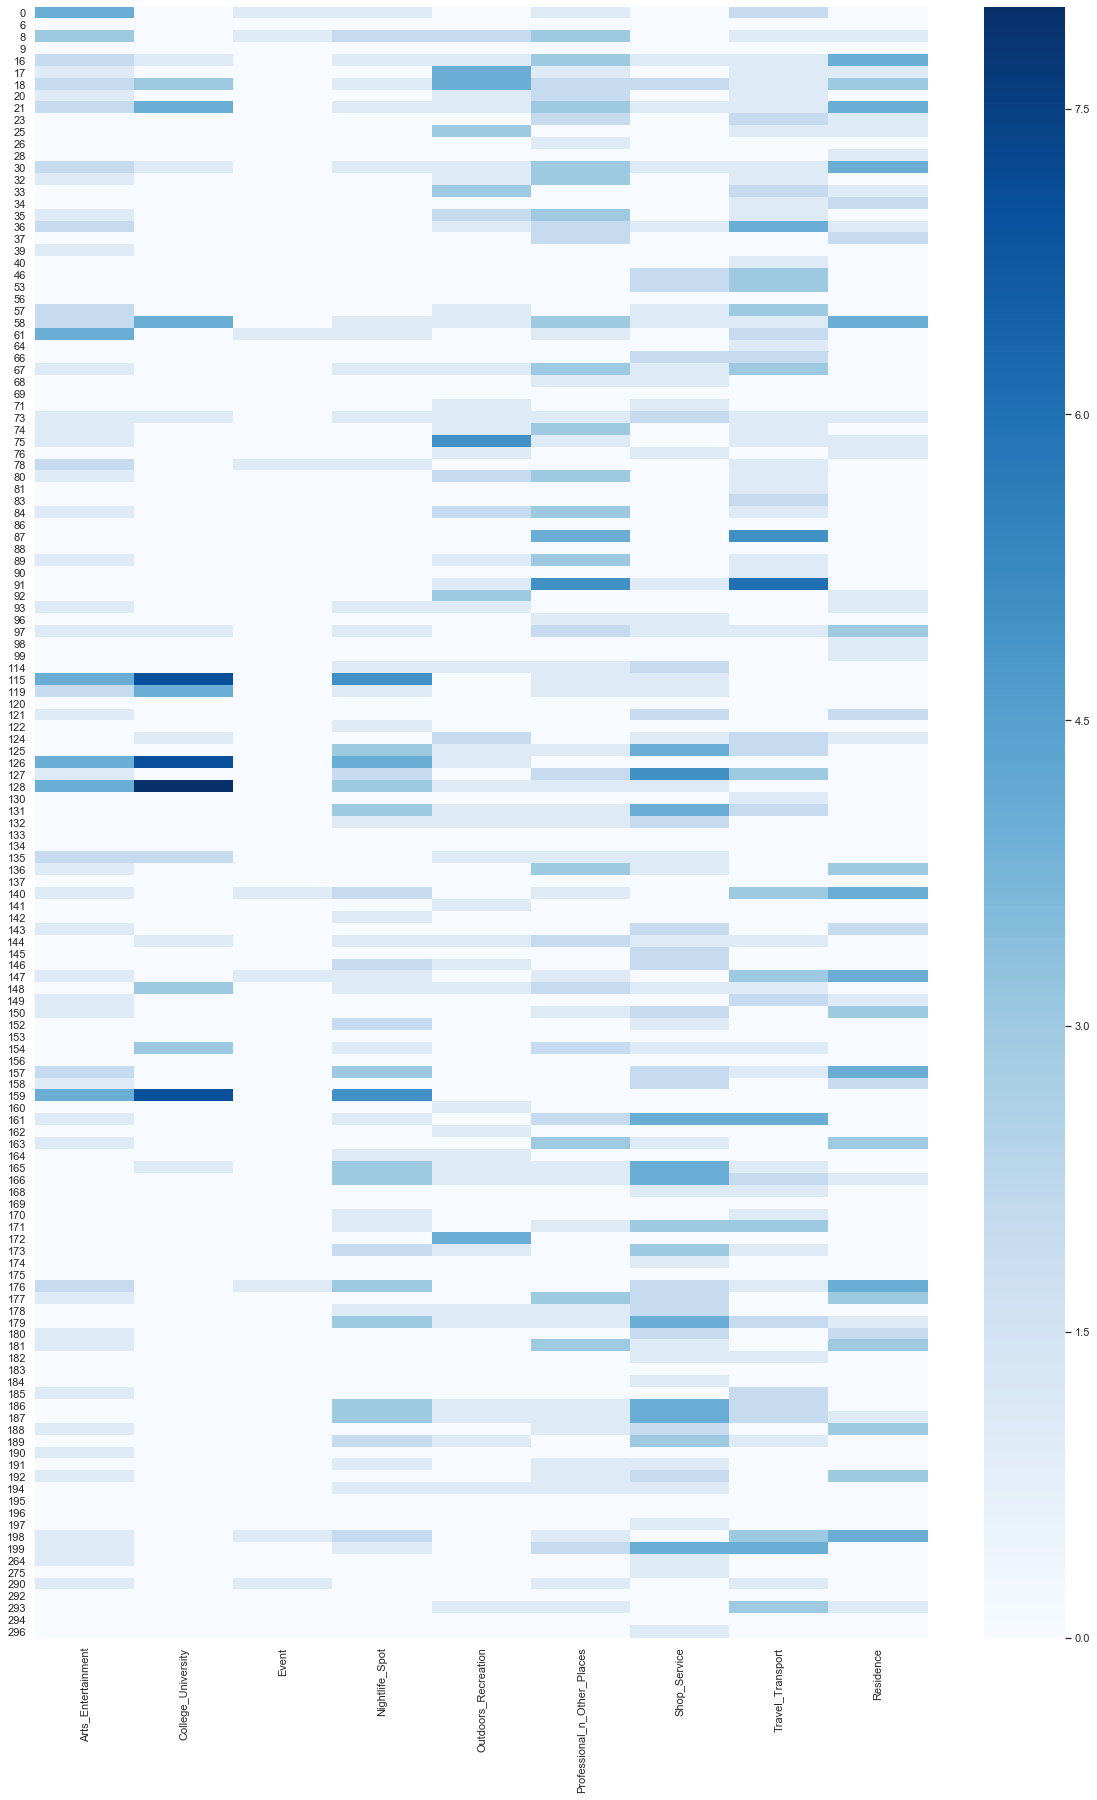

In [93]:
plt.figure(figsize= (20,30))
sns.heatmap(clusters[0].loc[:,'Arts_Entertainment':"Residence"],cmap = 'Blues')

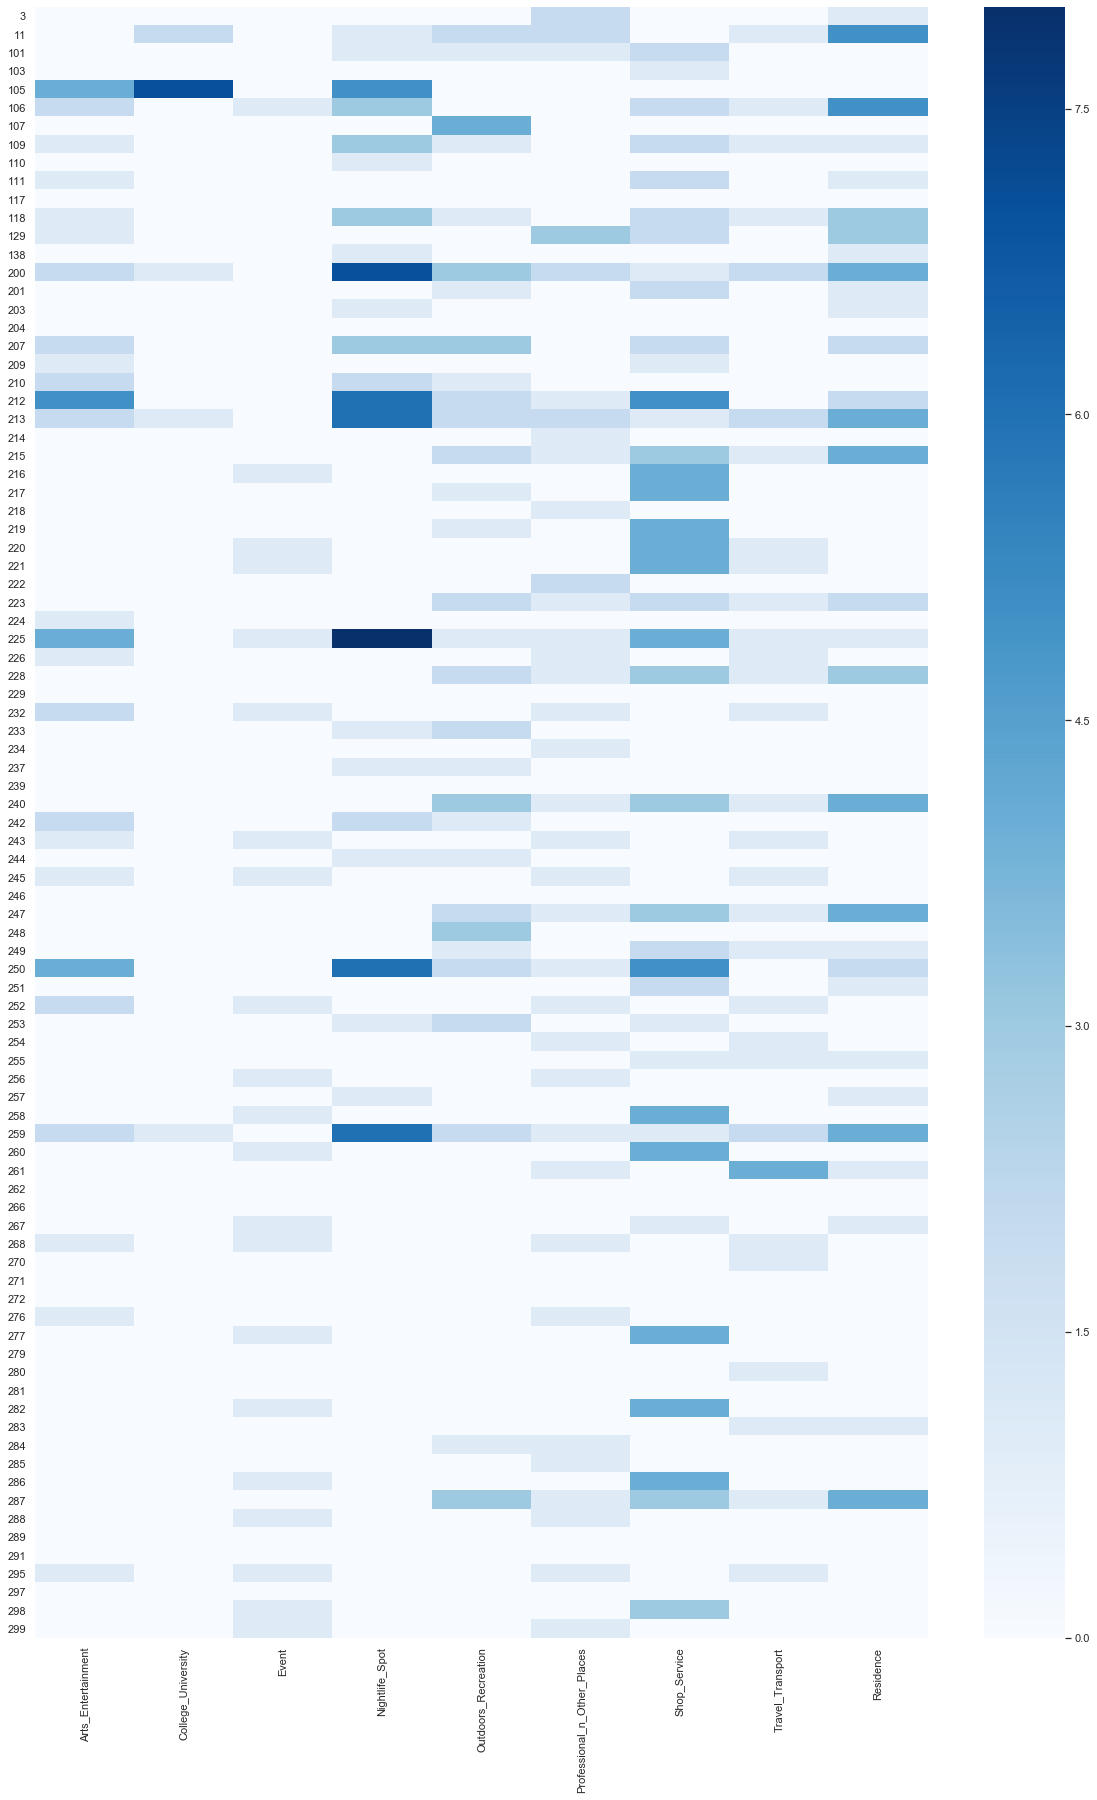

In [94]:
plt.figure(figsize= (20,30))
sns.heatmap(clusters[1].loc[:,'Arts_Entertainment':'Residence'],cmap = 'Blues')

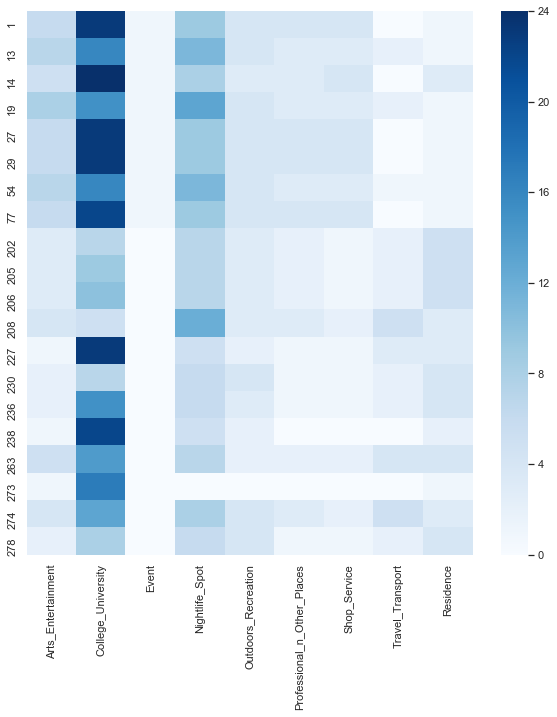

In [85]:
plt.figure(figsize= (10,10))
sns.heatmap(clusters[2].loc[:,'Arts_Entertainment':"Residence"],cmap = 'Blues')

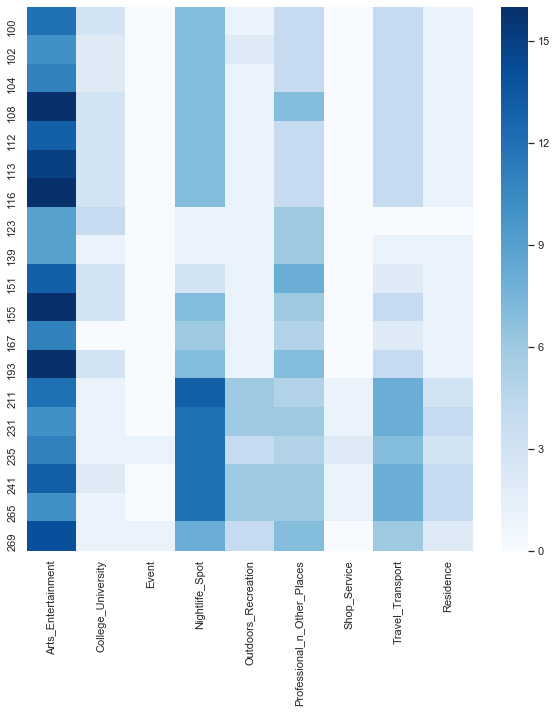

In [82]:
plt.figure(figsize= (10,10))
sns.heatmap(clusters[3].loc[:,'Arts_Entertainment':"Residence"],cmap = 'Blues')

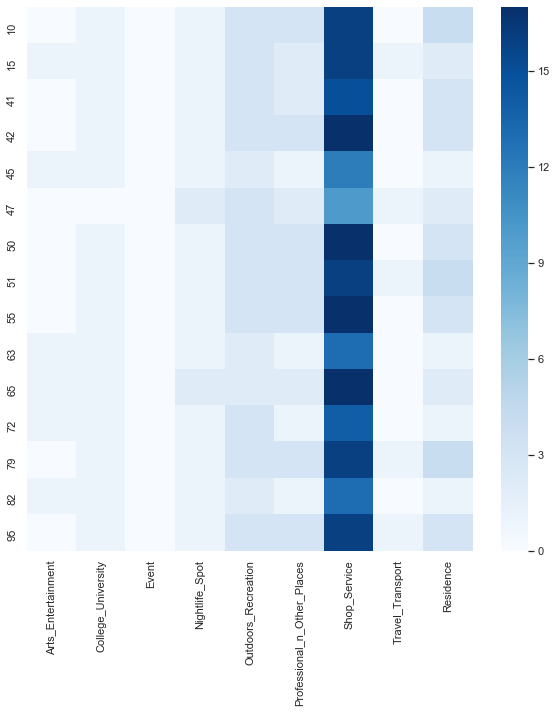

In [83]:
plt.figure(figsize= (10,10))
sns.heatmap(clusters[4].loc[:,'Arts_Entertainment':"Residence"],cmap = 'Blues')

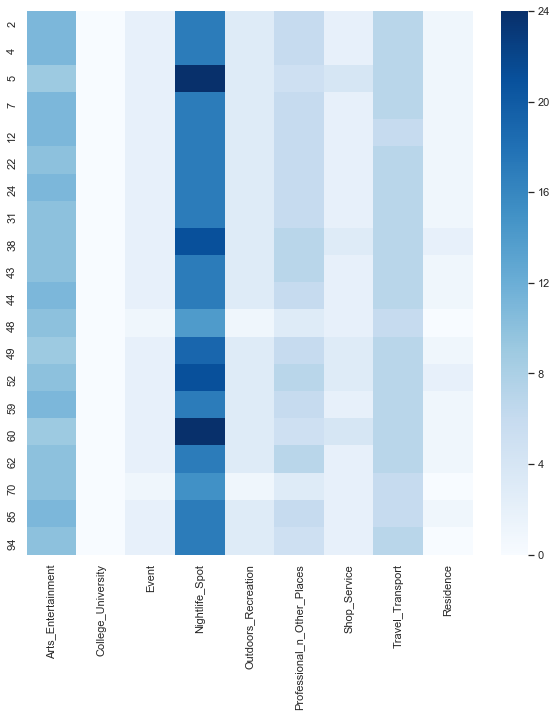

In [84]:
plt.figure(figsize= (10,10))
sns.heatmap(clusters[5].loc[:,'Arts_Entertainment':"Residence"],cmap = 'Blues')

From the Heatmaps we can see that, in cluster 3 and cluster 5, their restaurants have more venues around them than the other clusters, and it seems the cluster 3 is a better choice if we want to invest our money in to one of the restaurants, based on the location strategy

Visualize all the restaurants and the venues

First, i'm going to concat every city venues datas in two one dataframe, and then i'm going to plot every venue using their coordinate, and beside that i'm also going to plot all the restaurants with their clusters

In [99]:
def venues_dataframe(dataframes):
    venues = pd.DataFrame()
    for i in dataframes.keys():
        venues = pd.concat([dataframes[i], venues], axis = 0)
    venues.reset_index(inplace=True, drop=True)
    return venues
d1 = venues_dataframe(Tuscaloosa_venues)
d2 = venues_dataframe(Montgomery_venues)
d3 = venues_dataframe(Brimingham_venues)
venues = pd.concat([d1,d2,d3], axis = 0).reset_index(drop=True)

In [100]:
venues.head()

categories                        id  \
0  Residential Building (Apartment / Condo)  4c66de7919f3c9b6ff20a1ff   
1  Residential Building (Apartment / Condo)  4c0c04e57e3fc9282731f682   
2  Residential Building (Apartment / Condo)  4c5b243904f9be9ab78df360   
3  Residential Building (Apartment / Condo)  56468afd498ea0ff87ff9e60   
4  Residential Building (Apartment / Condo)  4e0e3171d4c0f6d6b3f7b912   

                           location.formattedAddress  location.lat  \
0  1100 Hargrove Rd E, Tuscaloosa, AL 35405, Unit...     33.189918   
1  grace street (University blvd.), Tuscaloosa, A...     33.212656   
2  1900 Rice Mine Rd N, Tuscaloosa, AL 35406, Uni...     33.222982   
3  1418 10th Ave, Tuscaloosa, AL 35401, United St...     33.200005   
4  1100 17th St (17th St), Tuscaloosa, AL 35401, ...     33.197602   

   location.lng                    name  \
0    -87.521484     Redpoint Tuscaloosa   
1    -87.554469         Preston place 2   
2    -87.562209   High River Apartments   
3    -87.551736          Ion Tuscaloosa   
4    -87.552679  Crimson Student Living   

                                coordinate  
0  (33.18991839517019, -87.52148384698012)  
1  (33.21265578497721, -87.55446886038843)  
2  (33.22298177790168, -87.56220913207223)  
3  (33.20000484521273, -87.55173637349237)  
4   (33.19760245537503, -87.5526792509311)

In [106]:
venu_labels = venues['categories'] + ', ' + venues['name'].astype(str)
for lat, lon, poi in zip(venues['location.lat'], venues['location.lng'], venu_labels):
    label = folium.Popup(poi, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color= 'black',
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

## Conclusion

1. Cluster 0 : just by looking at the stat desc and the heatmap, we can see that cluster 0 have more variety of venues around their restaurants but the number of each venue is not a lot.
2. Cluster 1 : in cluster 1, the restaurants have higher rating, have more reviews, and the price for two is more expencive than the other restaurants in other cluster.
3. Cluster 2 : in cluster 2, the restaurants have higher then the other restaurants in other cluster except cluster 1, have a lot reviews, and the price for two is expencive enough but cheaper then in cluster 1. Based on the heatmap, cluster 2 have variety of venues around their restaurants, the number of each venue is also not a lot, but still higher than cluster 0. And if we want our restuarant have many students customer, we can consider restuarans in cluster 2, because the number of College in cluster 2 is higher than other restaurants in other clusters.
4. Cluster  3: From the Heatmaps we can see that, in cluster 3 their restaurants have more venues around them than the other clusters, and it seems the cluster 3 is a better choice if we want to invest our money in to one of the restaurants, based on the location strategy.
5. Cluster 4 : From the Heatmaps, we can see that 
6. Cluster 5: The same as Cluster 3, in cluster 5 their restaurants also have more venues around them than the other clusters, but the number of each venues is not higher than in cluster 3